# Predict Birth Rate 

Logistic regression method is used to predict birth rate of children. Hence, birth rate is the target variable. The data is information about the birth mother and are the predictors input into the logistic regression model. They include age, race, smoking status during pregnancy, hisotry of premature labor, history of hypertension, persence of uterine irritability, and number of physician visits during the first trimester. Identification code is also a variable in the dataset but is not a predictor variable. 

## Table of Contents
- [Low Birth Rate Data](#lowbirth_Data)
- [Load Libraries](#load_libraries)
- [Access data](#access_data)
- [Explore Data](#Explore)
- [Parse Data](#Parse)
- [Split Data into Training and Test set](#training_test)
- [Build Logistic Regression Model](#build_model)
- [Predict for Test data](#test_data)
- [Evaluate the Model](#evaluate_model)
- [ROC curve plot](#ROC_plot)

<a id="lowbirth_Data"></a>
## Low Birth Rate Data 
The Dataset Source: Hosmer, D.W., Lemeshow, S. and Sturdivant, R.X. (2013) Applied Logistic Regression, 3rd ed., New York: Wiley. This dataset is also part of the aplore3 R package.


 <table style="font-size: 16px; text-align: left;" width=100%>
  <tr>
  <td width=5% style="text-align: center; font-size: 16px">
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
   <b>Variable</b>
   </td>
   <td width=53% style="text-align: left; font-size: 16px">
   <b> Description</b>
   </td>
    <td width=31% rowspan=7>
 
   <img src='https://www.thesun.co.uk/wp-content/uploads/2017/01/nintchdbpict000297173575-e1485442893748.jpg?w=620?raw=true'></img>
  
  </td>
  </tr>
  <tr>
   <td width=5% style="text-align: center; font-size: 16px">
     0 
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
     ID 
   </td>
   <td width=53% style="text-align: left; font-size: 16px">
     Identification Code
   </td>
  
 </tr>
 <tr>
   <td style="text-align: center; font-size: 16px">
    1
  </td>
  <td style="text-align: left; font-size: 16px">
   Low 
  </td>
  <td style="text-align: left; font-size: 16px">
   Low birth weight (0: >= 2500, 1: < 2500 g). Target variable
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   2 
  </td>
  <td style="text-align: left; font-size: 16px">
  Age 
  </td>
  <td  style="text-align: left; font-size: 16px">
  Mother’s age in years
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  3 
  </td>
  <td style="text-align: left; font-size: 16px">
  Race 
  </td>
  <td style="text-align: left; font-size: 16px">
  Race (1: White, 2: Black, 3: Other)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  4 
  </td>
  <td style="text-align: left; font-size: 16px">
  Smoke
  </td>
  <td style="text-align: left; font-size: 16px">
  Smoking status during pregnancy (1: No, 2: Yes)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   5
  </td>
  <td style="text-align: left; font-size: 16px">
  PTL 
  </td>
  <td style="text-align: left; font-size: 16px">
  History of premature labor (1: None, 2: One, 3: Two, etc)
</tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   6 
  </td>
  <td style="text-align: left; font-size: 16px">
  HT 
  </td>
  <td  style="text-align: left; font-size: 16px">
  History of hypertension (1: No, 2: Yes)
</td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
    7
  </td>
  <td style="text-align: left; font-size: 16px">
   UI 
  </td>
  <td style="text-align: left; font-size: 16px">
   Presence of Uterine irritability (1: No, 2: Yes)
</td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   8 
  </td>
  <td style="text-align: left; font-size: 16px">
  FTV 
  </td>
  <td  style="text-align: left; font-size: 16px">
  Number of physician visits during the first trimester (1: None, 2: One, 3: Two, etc)
  </td>
 </tr>
</table>

<a id="load_libraries"></a>
## Load Libraries

The following Spark and Python libraries  are preinstalled in the notebook environment and are loaded by running the next cell.

In [1]:
# PySpark Machine Learning Library
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row, SQLContext

import os
import sys
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.regression import LabeledPoint
from numpy import array

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Library for confusion matrix, precision, test error
from pyspark.mllib.evaluation import MulticlassMetrics
# Library For Area under ROC curve and Area under precision-recall curve
from pyspark.mllib.evaluation import BinaryClassificationMetrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# Assign resources to the application
sqlContext = SQLContext(sc)

# packages for data analysis
import numpy as np
import pandas as pd

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


In [2]:
# The data will be loaded into an array.
# This is the summary of the data structure, including the column position and name.
# The first filed starts from position 0. 

# 0 ID    -  Identification code
# 1 Low  -  Low birth weight (0: >= 2500, 1: < 2500 g) -  target variable
# 2 Age - Mothers age in years
# 3 Race - Race (1: White, 2: Black, 3: Other)
# 4 Smoke - Smoking status during pregnancy (1: No, 2: Yes)
# 5 PTL - History of premature labor (1: None, 2: One, 3: Two, etc)
# 6 HT - History of hypertension (1: No, 2: Yes)
# 7 UI - Presence of Uterine irritability (1: No, 2: Yes)
# 8 FTV - Number of physician visits during the first trimester (1: None, 2: One, 3: Two, etc)

# Label is a target variable. 
# PersonInfo is a list of independent variables besides unique identifier
# PersonID is the unique identifier

LabeledDocument = Row("PersonID", "PersonInfo", "label")

# Define a function that parses each raw in CSV file and returns an object of type LabeledDocument

def parseDocument(line):
    values = [str(x) for x in line.split(',')] 
    if (values[1]>'0'):
      Low = 1.0
    else:
      Low = 0.0
        
    textValue = str(values[2]) + " " + str(values[3])+" " + str(values[4])+" " + str(values[5])+ " " + str(values[6])+ " " + str(values[7])+ " " + str(values[8])
    return LabeledDocument(values[0], textValue, Low)

<a id="access_data"></a>
## Access Data
To read a file from Object Storage, you must setup the Spark configuration with your Object Storage credentials. 

To do this, click on the cell below and select the **Insert to code > Insert Spark Session DataFrame** function from the Files tab below the data file you want to work with.

<div class="alert alert-block alert-info">The following code contains the credentials for a file in your IBM Cloud Object Storage. </div>

In [3]:

import ibmos2spark, os
# @hidden_cell
credentials = {
    'endpoint': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'service_id': 'iam-ServiceId-63c3a4e4-8673-4058-be10-17c4ce281ccb',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': '8Jl-2G0eQKYh8yX_KvRNA8zbfQaQMjDPXxfveD_m7AoF'
}

configuration_name = 'os_627af2c905754361b75b6afd763afd74_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema', 'true')\
  .load(cos.url('lowbwt.csv', 'lowbirthweight-donotdelete-pr-6eappgo7coocy2'))
df_data_1.take(5)


[Row(ID=85, LOW=0, AGE=19, RACE=2, SMOKE=0, PTL=0, HT=0, UI=1, FTV=0),
 Row(ID=86, LOW=0, AGE=33, RACE=3, SMOKE=0, PTL=0, HT=0, UI=0, FTV=3),
 Row(ID=87, LOW=0, AGE=20, RACE=1, SMOKE=1, PTL=0, HT=0, UI=0, FTV=1),
 Row(ID=88, LOW=0, AGE=21, RACE=1, SMOKE=1, PTL=0, HT=0, UI=1, FTV=2),
 Row(ID=89, LOW=0, AGE=18, RACE=1, SMOKE=1, PTL=0, HT=0, UI=1, FTV=0)]

<a id="Explore"></a>
## Explore Data

In [ ]:
df_data_1.toPandas().describe()

In [4]:
print('Number of Births', df_data_1.count())

Number of Births 189


In [5]:
#Number of high and low births
df_data_1.groupby('Low').count().show()

+---+-----+
|Low|count|
+---+-----+
|  1|   59|
|  0|  130|
+---+-----+



In [7]:
#Draw histogram for all variables
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df_data_1.toPandas(), df_data_1.toPandas().columns,6,3)

+---------+---+---+
|SMOKE_Low|  0|  1|
+---------+---+---+
|        1| 44| 30|
|        0| 86| 29|
+---------+---+---+



KeyError: 'Birthweight_SMOKE'

In [8]:
# Average age by birth weight 
# Convert Age data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["AGE"]=pd.to_numeric(pdf.AGE)

df=sqlContext.createDataFrame(pdf)

PAge=df.groupby(['Low'])\
.agg({"AGE": "AVG"}).toPandas()
PAge

,Low,avg(AGE)
0,0,23.661538
1,1,22.305085


### Distribution plots for potential input/predictor variables

<AxesSubplot:title={'center':'Age distribution'}, ylabel='Frequency'>

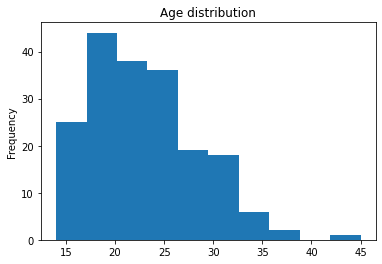

In [9]:
#Age distribution for all mothers
df.toPandas()["AGE"].plot.hist(x="Age", title="Age distribution")

<AxesSubplot:title={'center':'Age distribution for mothers who had low birth rate'}, ylabel='Frequency'>

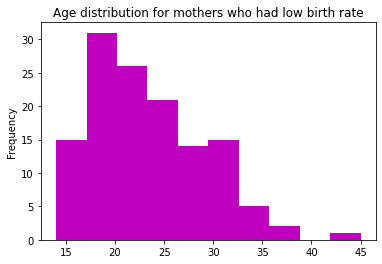

In [10]:
# Age distribution for mothers who had low birth rate
df_died=df.select('AGE', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('AGE').toPandas()
pdf_died.plot.hist('AGE',  color='m',legend=False, title="Age distribution for mothers who had low birth rate")

In [11]:
# Average age by birth weight 
# Convert Age data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["RACE"]=pd.to_numeric(pdf.RACE)

df=sqlContext.createDataFrame(pdf)

PAge=df.groupby(['RACE'])\
.agg({"RACE": "AVG"}).toPandas()
PAge

,RACE,avg(RACE)
0,1,1.0
1,3,3.0
2,2,2.0


<AxesSubplot:title={'center':'Race distribution'}, ylabel='Frequency'>

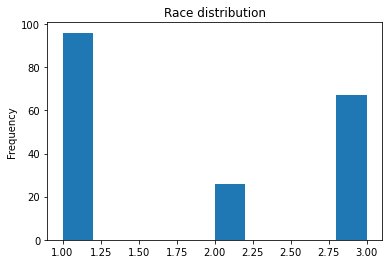

In [12]:
#Race distribution for all mothers
df.toPandas()["RACE"].plot.hist(x="Race", title="Race distribution")
#df.show()

<AxesSubplot:title={'center':'Race distribution for mothers who had low birth rate'}, ylabel='Frequency'>

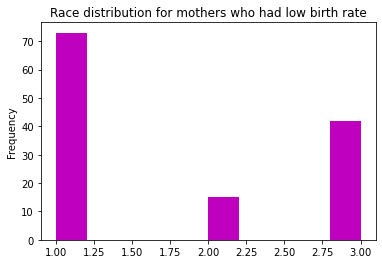

In [13]:
# Race distribution for mothers who had low birth rate
df_died=df.select('Race', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('Race').toPandas()
pdf_died.plot.hist('Race',  color='m',legend=False, title="Race distribution for mothers who had low birth rate")

In [14]:
# Smoke by birth weight 
# Convert Age data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["SMOKE"]=pd.to_numeric(pdf.SMOKE)

df=sqlContext.createDataFrame(pdf)


<AxesSubplot:title={'center':'Distribution of Smokers'}, ylabel='Frequency'>

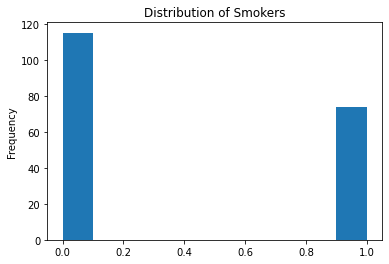

In [15]:
#Smoke(ers) distribution for all mothers
df.toPandas()["SMOKE"].plot.hist(x="Smoke", title="Distribution of Smokers")

<AxesSubplot:title={'center':'Smoker distribution for mothers who had low birth rate'}, ylabel='Frequency'>

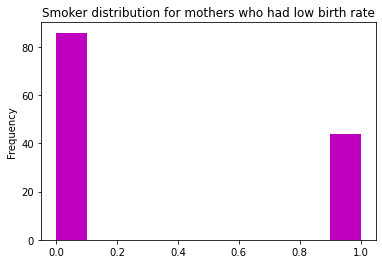

In [16]:
# Race distribution for mothers who had low birth rate
df_died=df.select('Smoke', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('Smoke').toPandas()
pdf_died.plot.hist('Smoke',  color='m',legend=False, title="Smoker distribution for mothers who had low birth rate")

In [29]:
# PTL by birth weight 
# Convert PTL data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["PTL"]=pd.to_numeric(pdf.PTL)

df=sqlContext.createDataFrame(pdf)

<AxesSubplot:title={'center':'PTL distribution'}, ylabel='Frequency'>

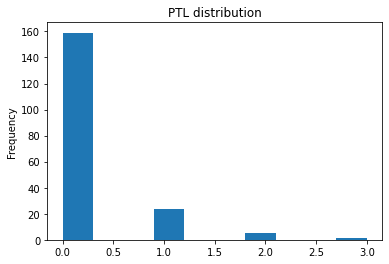

In [30]:
#PTL distribution for all mothers
df.toPandas()["PTL"].plot.hist(x="PTL", title="PTL distribution")

<AxesSubplot:title={'center':'PTL distribution for mothers who had low birth rate'}, ylabel='Frequency'>

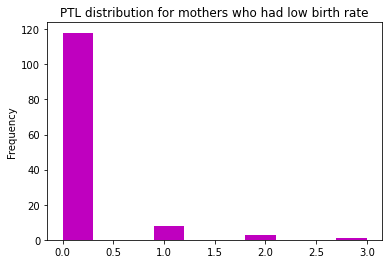

In [31]:
# Race distribution for mothers who had low birth rate
df_died=df.select('PTL', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('PTL').toPandas()
pdf_died.plot.hist('PTL',  color='m',legend=False, title="PTL distribution for mothers who had low birth rate")

In [33]:
# HT by birth weight 
# Convert HT data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["HT"]=pd.to_numeric(pdf.HT)

df=sqlContext.createDataFrame(pdf)

<AxesSubplot:title={'center':'HT distribution'}, ylabel='Frequency'>

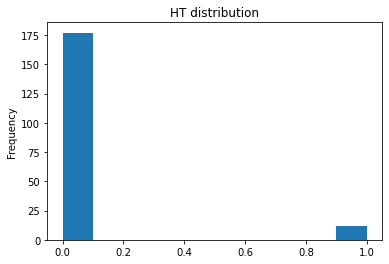

In [34]:
#HT distribution for all mothers
df.toPandas()["HT"].plot.hist(x="HT", title="HT distribution")

<AxesSubplot:title={'center':'HT distribution for mothers who had low birth rate'}, ylabel='Frequency'>

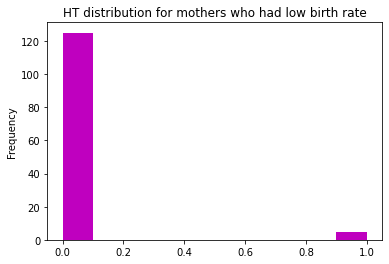

In [35]:
# Race distribution for mothers who had low birth rate
df_died=df.select('HT', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('HT').toPandas()
pdf_died.plot.hist('HT',  color='m',legend=False, title="HT distribution for mothers who had low birth rate")

In [36]:
# UI by birth weight 
# Convert UI data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["UI"]=pd.to_numeric(pdf.UI)

df=sqlContext.createDataFrame(pdf)

<AxesSubplot:title={'center':'UI distribution'}, ylabel='Frequency'>

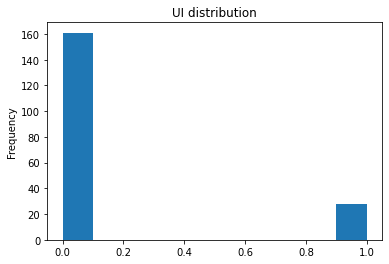

In [37]:
#UI distribution for all mothers
df.toPandas()["UI"].plot.hist(x="UI", title="UI distribution")

<AxesSubplot:title={'center':'UI distribution for mothers who had low birth rate'}, ylabel='Frequency'>

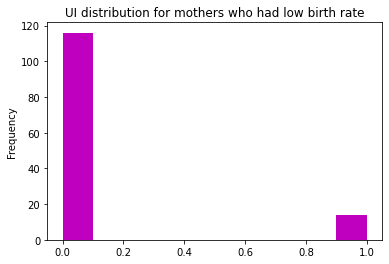

In [38]:
# Race distribution for mothers who had low birth rate
df_died=df.select('UI', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('UI').toPandas()
pdf_died.plot.hist('UI',  color='m',legend=False, title="UI distribution for mothers who had low birth rate")

In [39]:
# FTV by birth weight 
# Convert FTV data type from string to numeric.
pdf=df_data_1.toPandas()
pdf["FTV"]=pd.to_numeric(pdf.FTV)

df=sqlContext.createDataFrame(pdf)

<AxesSubplot:title={'center':'FTV distribution'}, ylabel='Frequency'>

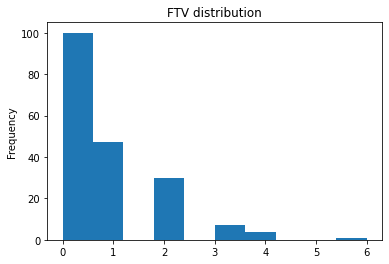

In [40]:
#UI distribution for all mothers
df.toPandas()["FTV"].plot.hist(x="FTV", title="FTV distribution")

<AxesSubplot:title={'center':'FTV distribution for mothers who had low birth rate'}, ylabel='Frequency'>

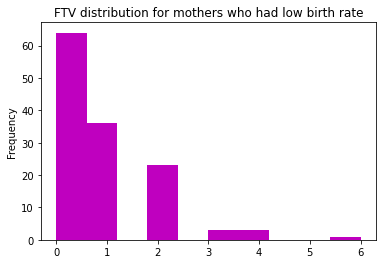

In [41]:
# Race distribution for mothers who had low birth rate
df_died=df.select('FTV', 'Low').filter(df['Low']=='0')
pdf_died=df_died.select('FTV').toPandas()
pdf_died.plot.hist('FTV',  color='m',legend=False, title="FTV distribution for mothers who had low birth rate")

In [ ]:
# Visualization plot?????
sn.pairplot(data=df_data_1.toPandas())

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(15,15))
sn.heatmap(df_data_1.toPandas().corr(), annot=True, linewidths=0.1)

<a id="Parse"></a>
## Parse Data
Loading the data into a `Spark RDD` and output the number of rows and first 5 rows.
Each project you create has a bucket in your object storage. You may get the bucket name from the project Settings page. Replace the string `BUCKET` to the bucket name

In [46]:
data = sc.textFile(cos.url('lowbwt.csv', 'lowbirthweight-donotdelete-pr-6eappgo7coocy2'))
print ("Total records in the data set:", data.count())
print ("The first 5 rows")
data.take(5)

Total records in the data set: 190
The first 5 rows


['ID,LOW,AGE,RACE,SMOKE,PTL,HT,UI,FTV',
 '85,0,19,2,0,0,0,1,0',
 '86,0,33,3,0,0,0,0,3',
 '87,0,20,1,1,0,0,0,1',
 '88,0,21,1,1,0,0,1,2']

Create DataFrame from RDD

In [47]:
#Parse and Load the data into a dataframe. The code calls the parsing function defined above
documents = data.filter(lambda s: "ID" not in s).map(parseDocument)
lowbwt = documents.toDF() # ToDataFrame
print ("Number of records: " + str(lowbwt.count()))
print ( "First 5 records: ")
lowbwt.take(5)

Number of records: 189
First 5 records: 


[Row(PersonID='85', PersonInfo='19 2 0 0 0 1 0', label=0.0),
 Row(PersonID='86', PersonInfo='33 3 0 0 0 0 3', label=0.0),
 Row(PersonID='87', PersonInfo='20 1 1 0 0 0 1', label=0.0),
 Row(PersonID='88', PersonInfo='21 1 1 0 0 1 2', label=0.0),
 Row(PersonID='89', PersonInfo='18 1 1 0 0 1 0', label=0.0)]

<a id="training_test"></a>
## Split Data into Training and Test set

We divide the data into training and test set.  The training set is used to build the model to be used on future data, and the test set is used to evaluate the model.

In [48]:
# Divide the data into training and test set
(train, test) = lowbwt.randomSplit([0.8, 0.2])
print ("Number of records in the training set: " + str(train.count()))
print ("Number of records in the test set: " + str(test.count()))
# Output first 20 records in the training set
print ("First 20 records in the training set: ")
train.show()

Number of records in the training set: 158
Number of records in the test set: 31
First 20 records in the training set: 
+--------+--------------+-----+
|PersonID|    PersonInfo|label|
+--------+--------------+-----+
|     100|18 1 1 0 0 0 0|  0.0|
|     101|18 1 1 0 0 0 0|  0.0|
|     102|15 2 0 0 0 0 0|  0.0|
|     103|25 1 1 0 0 0 3|  0.0|
|     104|20 3 0 0 0 1 0|  0.0|
|     105|28 1 1 0 0 0 1|  0.0|
|     107|31 1 0 0 0 1 3|  0.0|
|     108|36 1 0 0 0 0 1|  0.0|
|     109|28 3 0 0 0 0 0|  0.0|
|     111|25 3 0 0 0 1 2|  0.0|
|     112|28 1 0 0 0 0 0|  0.0|
|     113|17 1 1 0 0 0 0|  0.0|
|     114|29 1 0 0 0 0 2|  0.0|
|     115|26 2 1 0 0 0 0|  0.0|
|     116|17 2 0 0 0 0 1|  0.0|
|     117|17 2 0 0 0 0 1|  0.0|
|     119|35 2 1 1 0 0 1|  0.0|
|     120|25 1 0 0 0 0 1|  0.0|
|     121|25 2 0 0 0 0 0|  0.0|
|     123|29 1 1 0 0 0 2|  0.0|
+--------+--------------+-----+
only showing top 20 rows



<a id="build_model"></a>
## Build Logistic Regression Model

We use the Pipeline of SparkML to build the Logistic Regression Model

In [49]:
# set up Logistic Regression using Pipeline of SparkML
tokenizer = Tokenizer(inputCol="PersonInfo", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

In [50]:
# set up Logistic Regression Model
# the stages are executed in order
model = pipeline.fit(train)
#[stage.coefficients for stage in model.stages if hasattr(stage, "coefficients")]
# model.stages[2].intercept

<a id="test_data"></a>
## Predict for Test data

In [51]:
# Make predictions for test data and print columns of interest
prediction = model.transform(test)
selected = prediction.select("PersonInfo", "prediction", "probability")
for row in selected.collect():
    print (row)

Row(PersonInfo='32 3 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.6217, 0.3783]))
Row(PersonInfo='24 1 1 1 0 0 1', prediction=1.0, probability=DenseVector([0.1247, 0.8753]))
Row(PersonInfo='19 1 1 0 0 0 2', prediction=0.0, probability=DenseVector([0.7687, 0.2313]))
Row(PersonInfo='19 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.9449, 0.0551]))
Row(PersonInfo='23 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.8478, 0.1522]))
Row(PersonInfo='23 3 0 0 0 0 2', prediction=0.0, probability=DenseVector([0.7175, 0.2825]))
Row(PersonInfo='20 1 0 2 0 1 1', prediction=1.0, probability=DenseVector([0.261, 0.739]))
Row(PersonInfo='32 1 1 1 0 0 4', prediction=0.0, probability=DenseVector([0.7302, 0.2698]))
Row(PersonInfo='30 3 0 0 0 0 0', prediction=0.0, probability=DenseVector([0.9547, 0.0453]))
Row(PersonInfo='19 2 0 0 0 1 0', prediction=0.0, probability=DenseVector([0.9039, 0.0961]))
Row(PersonInfo='21 1 1 0 0 1 2', prediction=1.0, probability=DenseVector([0.3068, 

In [52]:
#Tabulate the predicted outcome
prediction.select("prediction").groupBy("prediction").count().show(truncate=False)

+----------+-----+
|prediction|count|
+----------+-----+
|0.0       |24   |
|1.0       |7    |
+----------+-----+



In [53]:
#Tabulate the actual outcome
prediction.select("label").groupBy("label").count().show(truncate=False)

+-----+-----+
|label|count|
+-----+-----+
|0.0  |18   |
|1.0  |13   |
+-----+-----+



In [54]:
# This table shows:
# 1. The number of children with low birthrate
# 2. The number of children with high birthrate
# 3. The number of children who predicted as low birthrate
# 4. The number of children who predicted as high birthrate

prediction.crosstab('label', 'prediction').show()

+----------------+---+---+
|label_prediction|0.0|1.0|
+----------------+---+---+
|             0.0| 15|  3|
|             1.0|  9|  4|
+----------------+---+---+



<a id="evaluate_model"></a>
## Evaluate the Model

We evaluate the model on a training set and on a test set.  The purpose is to measure the model's predictive accuracy, including the accuracy for new data.

In [55]:
# Evaluate the Logistic Regression model on a training set
# Select (prediction, true label) and compute test error
pred_lr=model.transform(train).select("prediction", "label")
eval_lr=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_lr=eval_lr.evaluate(pred_lr)
# create RDD
predictionAndLabels_lr=pred_lr.rdd
metrics_lr=MulticlassMetrics(predictionAndLabels_lr)
precision_lr=metrics_lr.precision(1.0)
recall_lr=metrics_lr.recall(1.0)
f1Measure_lr = metrics_lr.fMeasure(1.0, 1.0)
print ("Model evaluation for the training data")
print ("Accuracy = %s" %accuracy_lr)
print ("Error = %s" % (1-accuracy_lr))
print ("Precision = %s" %precision_lr)
print ("Recall = %s" %recall_lr)
print("F1 Measure = %s" % f1Measure_lr)

/opt/ibm/spark/python/lib/pyspark.zip/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


Model evaluation for the training data
Accuracy = 0.7658227848101266
Error = 0.23417721518987344
Precision = 0.6451612903225806
Recall = 0.43478260869565216
F1 Measure = 0.5194805194805194


In [56]:
# Evaluate the Logistic Regression model on a test set
# Select (prediction, true label) and compute test error
pred_lr=model.transform(test).select("prediction", "label")
eval_lr=MulticlassClassificationEvaluator (
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_lr=eval_lr.evaluate(pred_lr)
# create RDD
predictionAndLabels_lr=pred_lr.rdd
metrics_lr=MulticlassMetrics(predictionAndLabels_lr)
precision_lr=metrics_lr.precision(1.0)
recall_lr=metrics_lr.recall(1.0)
f1Measure_lr = metrics_lr.fMeasure(1.0, 1.0)
print ("Model evaluation for the test data")
print ("Accuracy = %s" %accuracy_lr)
print ("Error = %s" % (1-accuracy_lr))
print ("Precision = %s" %precision_lr)
print ("Recall = %s" %recall_lr)
print ("F1 Measure = %s" % f1Measure_lr)

Model evaluation for the test data
Accuracy = 0.6129032258064516
Error = 0.3870967741935484
Precision = 0.5714285714285714
Recall = 0.3076923076923077
F1 Measure = 0.4


In [57]:
bin_lr=BinaryClassificationMetrics(predictionAndLabels_lr)

# Area under precision-recall curve
print("Area under PR = %s" % bin_lr.areaUnderPR)
# Area under Receiver operating characteristic curve
print("Area under ROC = %s" % bin_lr.areaUnderROC)

Area under PR = 0.5187876639489543
Area under ROC = 0.5705128205128206


<a id="ROC_plot"></a>
## ROC Curve Plot
The Binary Logistic Regression method returns the pyspark.ml.classification.BinaryLogisticRegressionTrainingSummary object. We may use the roc method to obtain the coordinates of the points on Receiver operating characteristic (ROC) curve.  The coordinates are stored in a Dataframe with two fields FPR=false positive rate and TPR=true positive rate

In [58]:
#The firt 20 ROC curve points
model.stages[2].summary.roc.show()

+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|                 0.0|0.021739130434782608|
|                 0.0|0.043478260869565216|
|0.008928571428571428|0.043478260869565216|
|0.008928571428571428| 0.06521739130434782|
|0.017857142857142856| 0.06521739130434782|
|0.017857142857142856| 0.08695652173913043|
|0.017857142857142856| 0.10869565217391304|
|0.017857142857142856| 0.13043478260869565|
|0.026785714285714284| 0.13043478260869565|
|0.026785714285714284| 0.15217391304347827|
|0.026785714285714284| 0.17391304347826086|
|0.026785714285714284|  0.1956521739130435|
|0.026785714285714284| 0.21739130434782608|
| 0.03571428571428571| 0.21739130434782608|
| 0.03571428571428571|  0.2391304347826087|
|0.044642857142857144|  0.2826086956521739|
|0.044642857142857144| 0.30434782608695654|
| 0.05357142857142857| 0.32608695652173914|
| 0.05357142857142857| 0.3478260

<AxesSubplot:xlabel='FPR'>

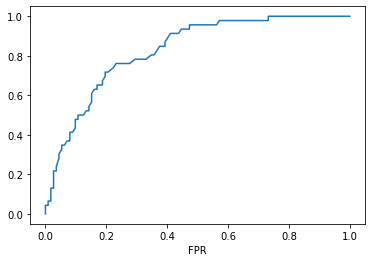

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
ROC=model.stages[2].summary.roc
df=ROC.toPandas()

df.plot(x='FPR', y='TPR', legend=False)